<a href="https://colab.research.google.com/github/sameerkulkarni/financial_simulations/blob/master/base_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Financial Simulations**

Measure different investment strategies

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
findata = pd.read_csv("https://raw.githubusercontent.com/sameerkulkarni/financial_simulations/master/returns.csv", sep=",")

In [0]:
print(findata.loc[2])

Date         1928-03-01
Open               17.3
High              19.28
Low                17.3
Close             19.28
Adj Close         19.28
Inflation         -1.16
Name: 2, dtype: object


In [0]:
# Basic Strategy: Invest from the beginning to the end.
def calculate_returns(startpoint, duration):
  begin = findata.loc[startpoint]['Adj Close']
  end = findata.loc[startpoint+(duration*12)]['Adj Close']
  total_returns = 1+ ((end-begin)/begin)
  avg_returns = (total_returns**(1.0/duration))
  return avg_returns

In [0]:
num_years=25
num_samples=20000
start_points=[random.randint(0,(92-num_years)*12) for i in range(num_samples)]
yearly_returns = [calculate_returns(start_points[i],num_years) for i in range(len(start_points))]
avg_of_avg_returns=np.average(yearly_returns)
print(avg_of_avg_returns)

1.0706449340882223


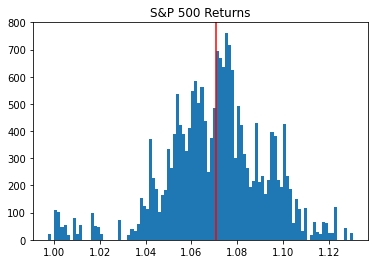

In [0]:
plt.hist(yearly_returns, bins=100)
plt.title("S&P 500 Returns")
plt.axvline(avg_of_avg_returns,color='r')
plt.show()